Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB

Dataset Preview:


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN



Missing Values Summary Before Cleaning:
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

Feature Engineering Preview:


<ipython-input-1-184f2798e007>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Position'].fillna('Unknown', inplace=True)


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Event Type,Event Minute,Is Captain
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,Other,NaN,0
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,Other,NaN,0
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,Unknown,G40',Goal,40.0,0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,Unknown,G70',Goal,70.0,0
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,Unknown,NaN,Other,NaN,0


<ipython-input-1-184f2798e007>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=goals_by_team.head(10).index, y=goals_by_team.head(10).values, palette="Blues_d")



Top Teams by Goals Scored:
Team Initials
BRA    176
FRG    103
ITA    100
ARG     98
GER     80
FRA     79
NED     72
ESP     65
URU     62
SWE     59
Name: Event Type, dtype: int64

Top Players by Goals Scored:
Player Name
RONALDO                               13
KLOSE                                 12
Uwe SEELER                             9
M�LLER                                 9
Gerd MUELLER                           9
PEL� (Edson Arantes do Nascimento)     8
Grzegorz LATO                          8
Helmut RAHN                            8
JAIRZINHO                              8
BEBETO                                 6
Teofilo CUBILLAS                       6
Paolo ROSSI                            6
RIVALDO                                6
Rudi VOELLER                           6
Hans SCHAEFER                          6
Name: Event Type, dtype: int64

Captain's Contribution to Goals (Team-Wise):
Team Initials
ARG     9
AUT     5
BEL     9
BRA    10
BUL     1
CHI     2
CIV     2

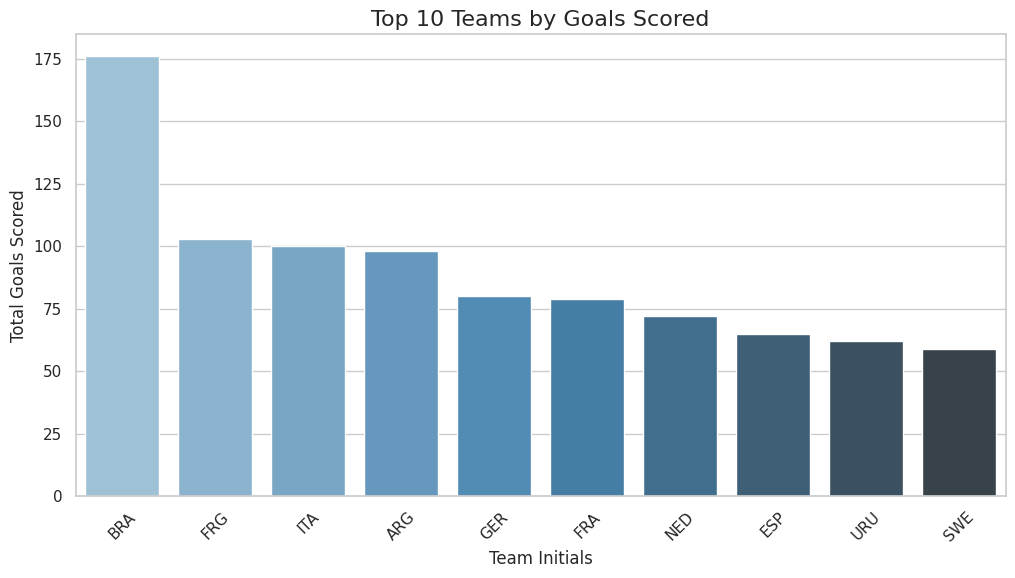

<ipython-input-1-184f2798e007>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.index, y=top_players.values, palette="coolwarm")


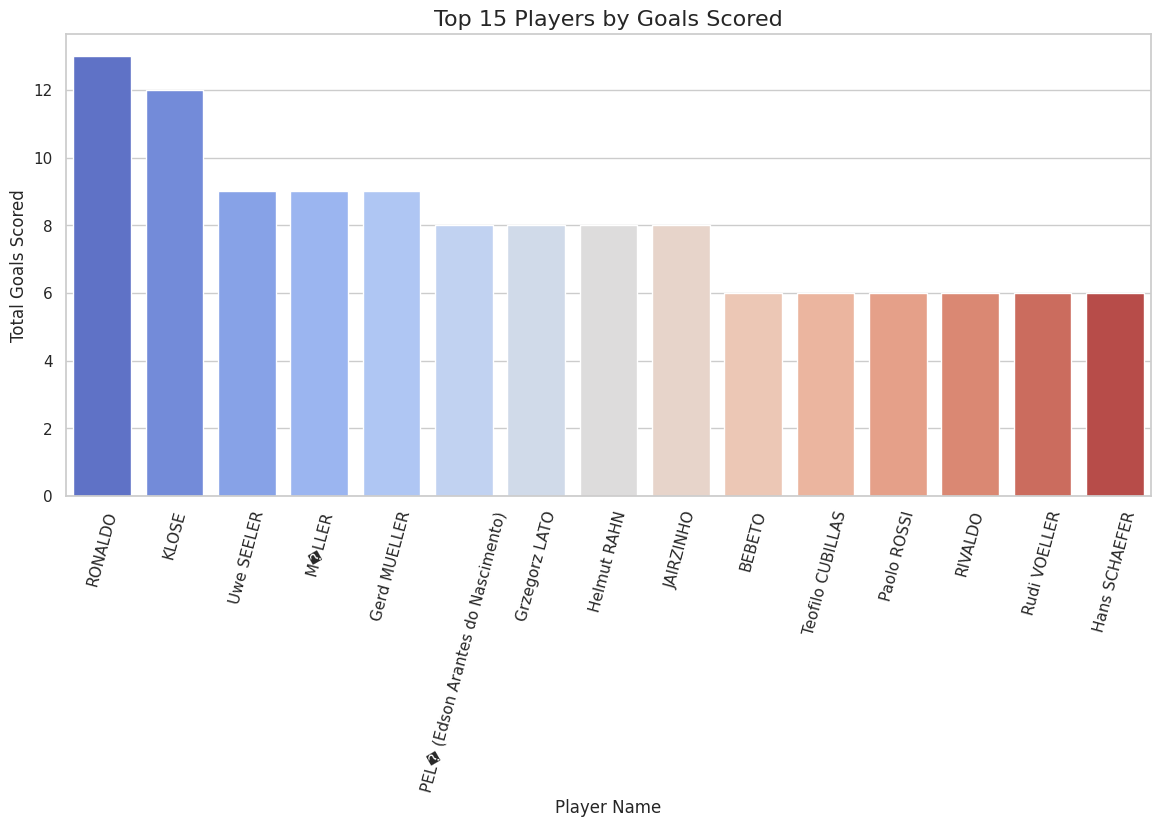

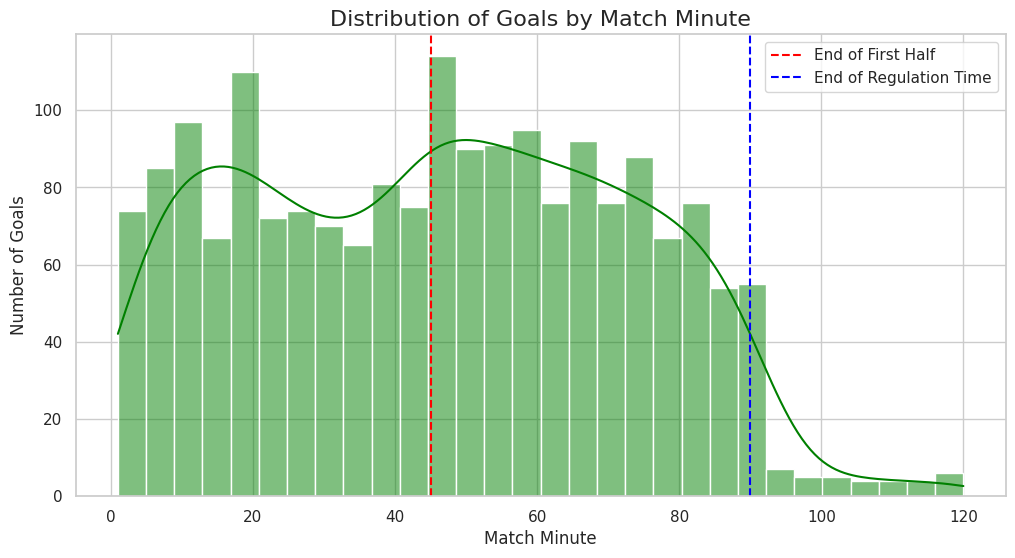

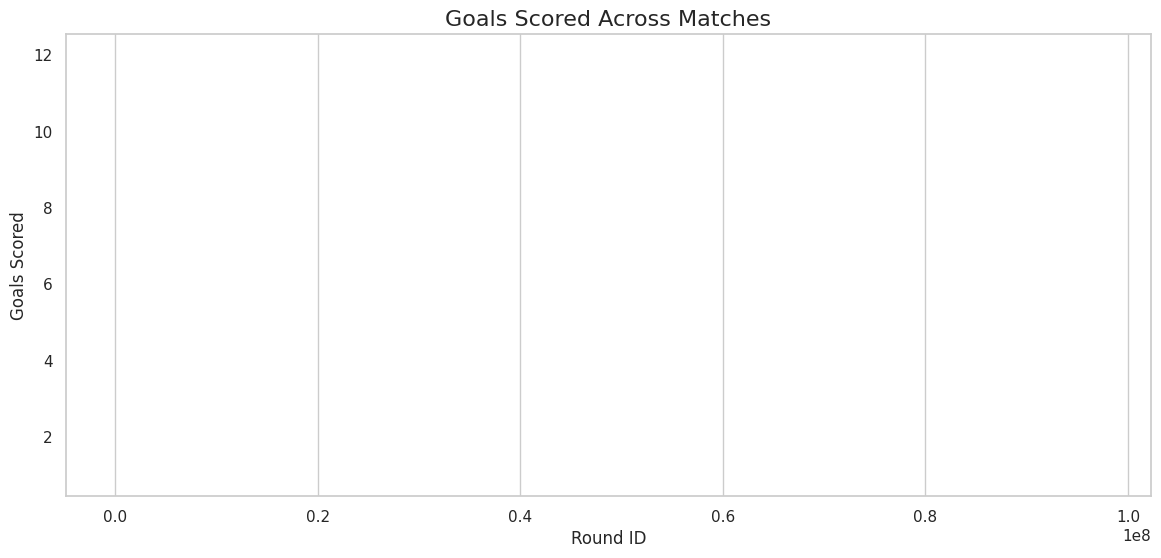

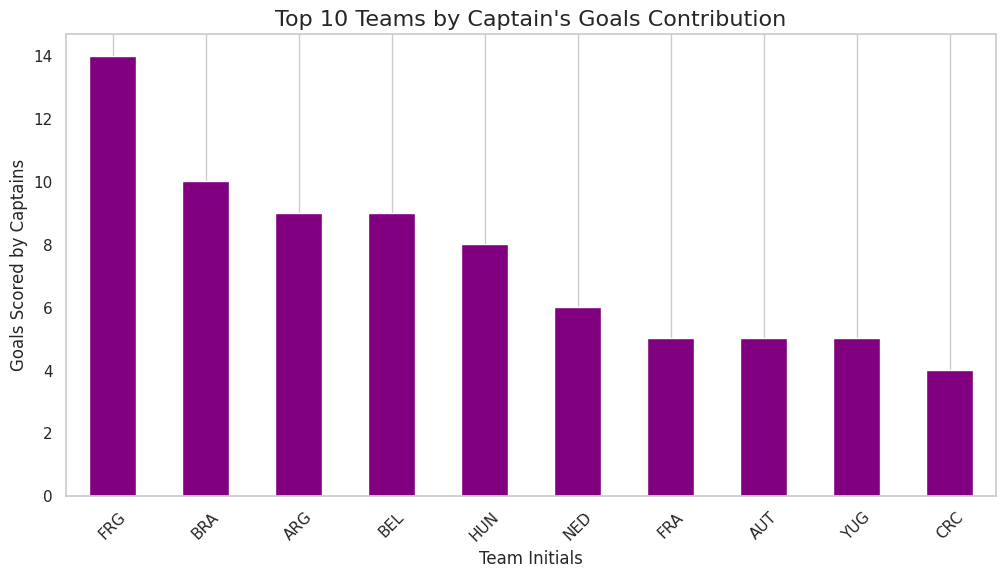

Cleaned and Enhanced Dataset Saved to: detailed_cleaned_world_cup_data.csv


In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.ticker import MaxNLocator

# Configure Seaborn styles
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 8)

# Step 1: Load the Dataset
# Replace 'world_cup_matches.csv' with the actual file path
file_path = "/content/WorldCupPlayers.csv"
df = pd.read_csv(file_path)

# Display dataset information and a sample
print("Dataset Info:")
df.info()
print("\nDataset Preview:")
display(df.head())

# Step 2: Handle Missing Values
print("\nMissing Values Summary Before Cleaning:")
print(df.isnull().sum())

# Dropping rows with missing player names and key columns
df.dropna(subset=['Player Name', 'Team Initials'], inplace=True)

# Filling missing positions or setting them to 'Unknown' for robustness
df['Position'].fillna('Unknown', inplace=True)

# Step 3: Feature Engineering
# 1. Extracting Event Type: Identifying Goals vs. Other Events
df['Event Type'] = df['Event'].apply(lambda x: 'Goal' if pd.notna(x) and 'G' in str(x) else 'Other')

# 2. Extracting Goal Minutes
df['Event Minute'] = df['Event'].str.extract(r'(\d+)').astype(float)

# 3. Encoding Captaincy
df['Is Captain'] = df['Position'].apply(lambda x: 1 if 'C' in str(x) else 0)

# Preview after feature engineering
print("\nFeature Engineering Preview:")
display(df.head())

# Step 4: Exploratory Data Analysis (EDA)
# 1. Total Goals by Teams
goals_by_team = (
    df[df['Event Type'] == 'Goal']
    .groupby('Team Initials')['Event Type']
    .count()
    .sort_values(ascending=False)
)

# 2. Goals by Players
top_players = (
    df[df['Event Type'] == 'Goal']
    .groupby('Player Name')['Event Type']
    .count()
    .sort_values(ascending=False)
    .head(15)
)

# 3. Captains Contribution to Goals
captains_goals = df[(df['Event Type'] == 'Goal') & (df['Is Captain'] == 1)]
captains_goal_stats = captains_goals.groupby('Team Initials')['Player Name'].count()

# 4. Goals Over Time
goals_over_time = (
    df[df['Event Type'] == 'Goal']
    .groupby(['RoundID', 'MatchID'])['Event Type']
    .count()
    .reset_index()
    .rename(columns={'Event Type': 'Goals Scored'})
)

# 5. Event Minute Analysis
goal_minutes = df[df['Event Type'] == 'Goal']['Event Minute']

# Print EDA results
print("\nTop Teams by Goals Scored:")
print(goals_by_team.head(10))

print("\nTop Players by Goals Scored:")
print(top_players)

print("\nCaptain's Contribution to Goals (Team-Wise):")
print(captains_goal_stats)

# Step 5: Advanced Visualizations
# 1. Goals by Teams
plt.figure(figsize=(12, 6))
sns.barplot(x=goals_by_team.head(10).index, y=goals_by_team.head(10).values, palette="Blues_d")
plt.title("Top 10 Teams by Goals Scored", fontsize=16)
plt.xlabel("Team Initials", fontsize=12)
plt.ylabel("Total Goals Scored", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 2. Goals by Top Players
plt.figure(figsize=(14, 6))
sns.barplot(x=top_players.index, y=top_players.values, palette="coolwarm")
plt.title("Top 15 Players by Goals Scored", fontsize=16)
plt.xlabel("Player Name", fontsize=12)
plt.ylabel("Total Goals Scored", fontsize=12)
plt.xticks(rotation=75)
plt.show()

# 3. Distribution of Goals by Minute
plt.figure(figsize=(12, 6))
sns.histplot(goal_minutes, kde=True, bins=30, color="green")
plt.title("Distribution of Goals by Match Minute", fontsize=16)
plt.xlabel("Match Minute", fontsize=12)
plt.ylabel("Number of Goals", fontsize=12)
plt.axvline(x=45, color='red', linestyle='--', label="End of First Half")
plt.axvline(x=90, color='blue', linestyle='--', label="End of Regulation Time")
plt.legend()
plt.show()

# 4. Goals Over Matches
plt.figure(figsize=(14, 6))
sns.lineplot(data=goals_over_time, x='RoundID', y='Goals Scored', hue='MatchID', palette="viridis", legend=None)
plt.title("Goals Scored Across Matches", fontsize=16)
plt.xlabel("Round ID", fontsize=12)
plt.ylabel("Goals Scored", fontsize=12)
plt.grid(axis='y')
plt.show()

# 5. Captain's Contribution to Goals
plt.figure(figsize=(12, 6))
captains_goal_stats.sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Teams by Captain's Goals Contribution", fontsize=16)
plt.xlabel("Team Initials", fontsize=12)
plt.ylabel("Goals Scored by Captains", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Save the Cleaned and Enhanced Dataset
cleaned_file_path = "detailed_cleaned_world_cup_data.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned and Enhanced Dataset Saved to: {cleaned_file_path}")
